<a href="https://colab.research.google.com/github/johnreyes96/modeling-and-simulation/blob/master/src/main/python/classes/SegmentacionDataSetMall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segmentación y agrupamiento de clientes usando K-means en Python



- ¿Qué es la segmentación de clientes?

La segmentación de clientes es la práctica de dividir una base de clientes en grupos que tienen características homogéneas como edad, género, intereses y hábitos de consumo, etc.

- Beneficios de la segmentación de clientes

Las empresas están interesadas en la segmentación de clientes porque cada cliente es diferente. Sus esfuerzos de marketing serían mejores si se dirigieran a grupos específicos y más pequeños con mensajes que esos consumidores encontrarían relevantes y, finalmente, los alentarían a comprar algo. Las empresas también están interesadas en conocer las características de estos grupos de clientes y sus preferencias de compra. Lo cual de nuevo ayudaría en la toma de decisiones de marketing.

La segmentación de clientes también puede ayudar a mejorar el servicio al cliente y asistir en la lealtad y retención de clientes. El material de marketing personalizado enviado al cliente es más apreciado por los clientes que simplemente enviarles anuncios de marketing generales. Hace que el cliente sea más valorado cuando la empresa tiene en cuenta el historial de compras de los clientes.

- Planteamiento del problema

Comprender los clientes objetivo para que el equipo de mercado planifique una estrategia

- Contexto

El gerente comercial quiere que el científico de datos identifique el grupo de compras más importante en función de los ingresos, la edad y el puntaje de compras en el centro comercial. Quiere el número ideal de grupos con una etiqueta para cada uno.

El objetivo es la segmentación del mercado, es decir, dividir el mercado objetivo o los clientes del centro comercial en grupos accesibles. Cree subconjuntos de clientes basados ​​en criterios demográficos y de comportamiento para comprender mejor el objetivo de las actividades de marketing.


## Cargando datos y librerias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/modeling_and_simulation

/content/drive/MyDrive/modeling_and_simulation


In [ ]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Análisis univariado

Antes de comenzar a agrupar, se realiza un análisis exploratorio de datos mediante las estadísticas descriptivas de los datos.

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Los diagramas de densidad

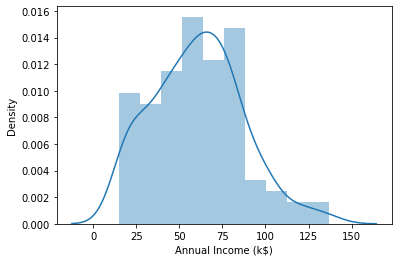

In [ ]:
sns.distplot(df['Annual Income (k$)']);

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Distribución de todas las variables

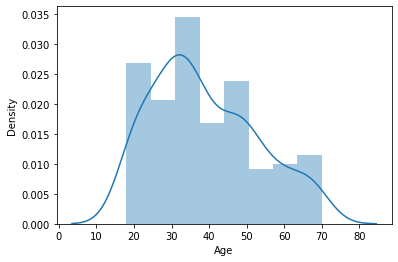

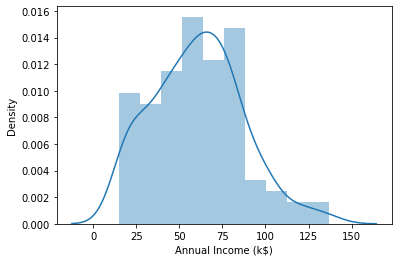

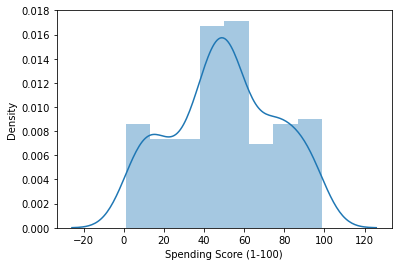

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

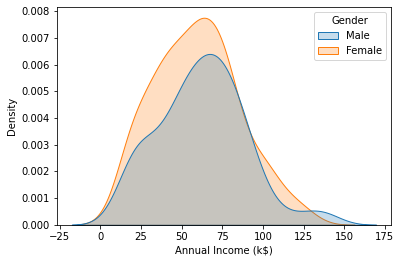

In [ ]:
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender']);

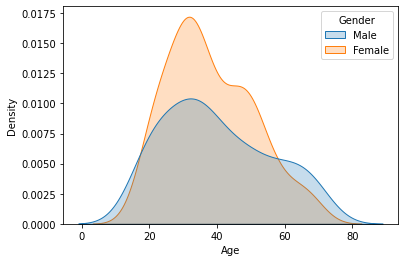

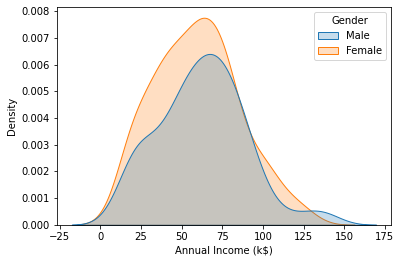

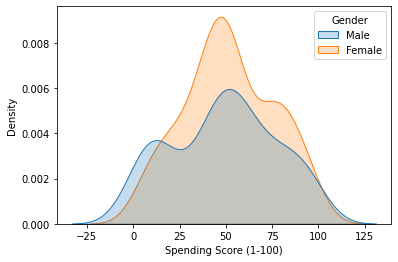

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

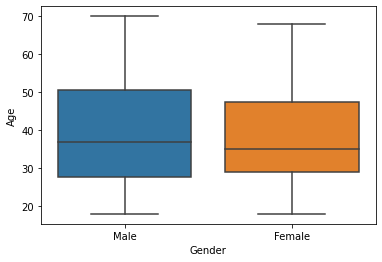

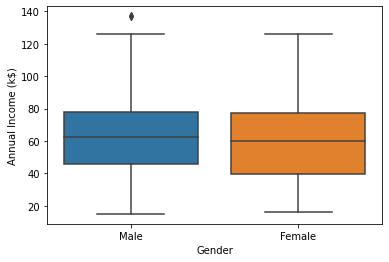

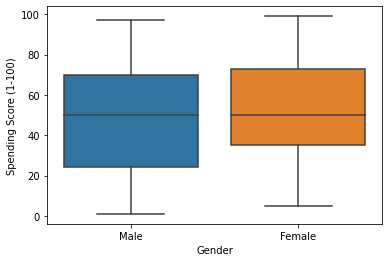

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [ ]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Análisis bivariado

El análisis bivariado es donde comparamos dos variables y con el propósito de determinar la relación empírica entre ellas. El gráfico de dispersión se utiliza para las comparaciones. Al menos cinco grupos o grupos de clientes son visibles en el siguiente diagrama de dispersión.

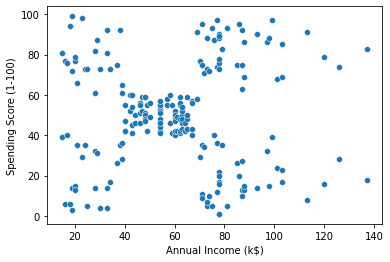

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

Se generan gráficos de pares que muestran la relación de todas las columnas y también muestran el tono según el género.



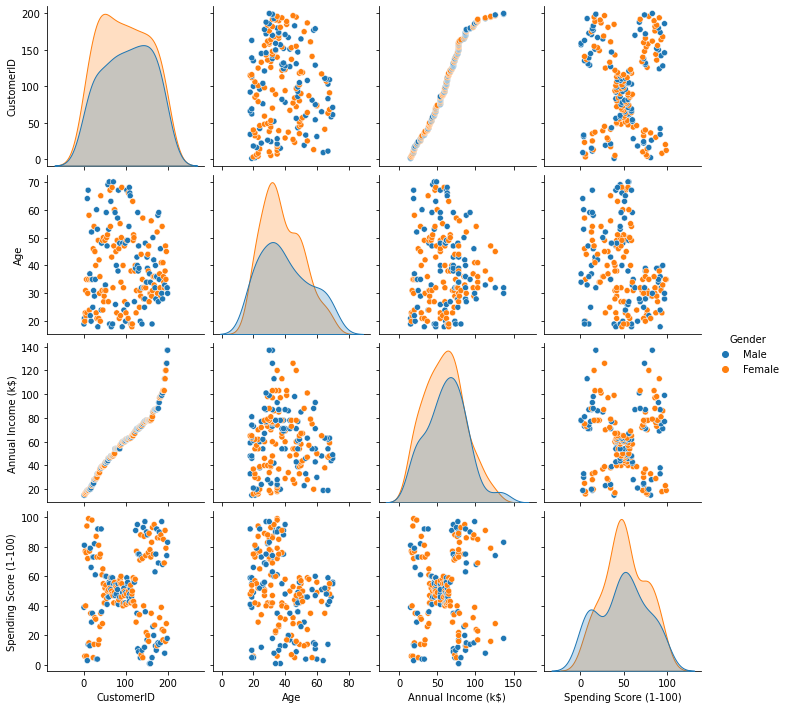

In [ ]:

sns.pairplot(df,hue='Gender')

Del gráfico anterior parece que hay un gran porcentaje de clientas en el conjunto de datos. Se explorará más a fondo. echemos un vistazo a la edad media, el ingreso anual y el puntaje de gasto según el género. El ingreso anual para los hombres es más alto y el puntaje de gasto es un poco más alto para las clientas.

In [ ]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


El valor R-cuadrado, denotado por R 2, es el cuadrado de la correlación. Mide la proporción de variación en la variable dependiente que se puede atribuir a la variable independiente. El valor de R-cuadrado R 2 está siempre entre 0 y 1 inclusive. Vamos a generar la correlación para todas las columnas. puntuación de gastos y la edad tiene una correlación negativa. Lo que significa que con el aumento de la edad, el puntaje de gasto disminuye. Y la puntuación anual de ingresos y gastos tiene una correlación ligeramente positiva. La correlación también se puede visualizar a través de mapas de calor.

In [ ]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


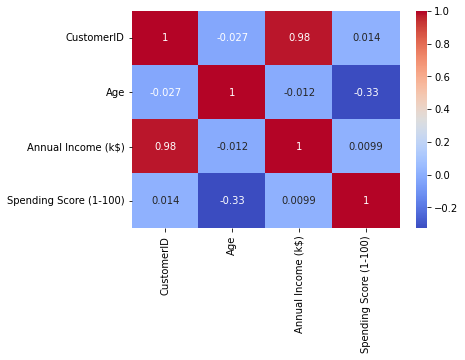

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Clustering 

Después de un análisis exploratorio, comencemos el agrupamiento real. Usamos el algoritmo K-medias aquí para la agrupación. Primero realizamos el agrupamiento univariado y el bivariado.

El agrupamiento de K-means es un tipo de aprendizaje no supervisado, que se usa cuando tiene datos sin etiquetar (es decir, datos sin categorías o grupos definidos). El objetivo de este algoritmo es encontrar grupos en los datos, con el número de grupos representado por la variable K. Comencemos eligiendo un valor aleatorio o cercano a lo que creemos que podría ser el número de grupos.

In [ ]:
clustering1 = KMeans(n_clusters=6)

Aquí el agrupamiento se basa en el ingreso anual, ya que estamos haciendo un agrupamiento univariante.

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

Las etiquetas de los grupos agrégarlas como una nueva columna en el conjunto de datos


In [ ]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [ ]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [ ]:
df['Income Cluster'].value_counts()

4    46
1    44
5    42
2    32
0    28
3     8
Name: Income Cluster, dtype: int64

La inercia mide qué tan bien K-Means agrupa un conjunto de datos. Se calcula midiendo la distancia entre cada punto de datos y su centroide, elevando al cuadrado esta distancia y sumando estos cuadrados en un grupo. Un buen modelo es uno con baja inercia Y un bajo número de grupos ( K ). Se podría encontrar un valor más bajo para encontrar N valor óptimo de conglomerados


In [ ]:
clustering1.inertia_

5081.484660267268

El método del codo ejecuta la agrupación de k-medias en el conjunto de datos para un rango de valores de k (por ejemplo, de 1 a 10) y luego, para cada valor de k, calcula una puntuación promedio para todas las agrupaciones. Usamos el método del codo aquí para encontrar una inercia más baja y un número apropiado de grupos.

In [ ]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [ ]:
intertia_scores

[137277.28000000006,
 48660.888888888876,
 23528.15217391306,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3941.4163614163635,
 2822.4996947496966,
 2189.2563714063717,
 1734.1677489177496]

Para determinar el número óptimo de grupos, tenemos que seleccionar el valor de k en el "codo", es decir, el punto después del cual la distorsión/inercia comienza a disminuir de forma lineal. Al mirar el gráfico a continuación, podemos ver que el codo comienza entre 2 y 4 en algún lugar donde 3. Elegimos 3 como número de grupos y volvemos a entrenar nuestro modelo.


Text(0, 0.5, 'Inertia')

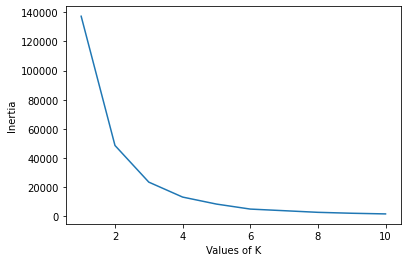

In [ ]:
plt.plot(range(1,11),intertia_scores)
plt.xlabel('Values of K')
plt.ylabel('Inertia')

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

Ahora podemos ver la media de cada uno de los tres grupos agrupados por grupo

In [ ]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.214286,93.000000,50.928571
1,41.613636,59.454545,49.045455
2,34.906250,22.000000,49.656250
3,36.500000,124.000000,49.625000
4,35.956522,74.391304,50.913043
5,43.000000,42.238095,50.666667


El agrupamiento bivariado es donde agrupamos nuestros puntos de datos, los clientes en este caso según dos columnas o características. Repitamos el mismo proceso, solo que esta vez tomaremos ambas columnas Ingreso anual y puntaje de gastos para crear grupos, tomaremos un número aleatorio para el grupo como 3 y luego trabajaremos más tarde para reducir la inercia y encontrar el número apropiado de grupos.


In [ ]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,4


Text(0, 0.5, 'Inertia')

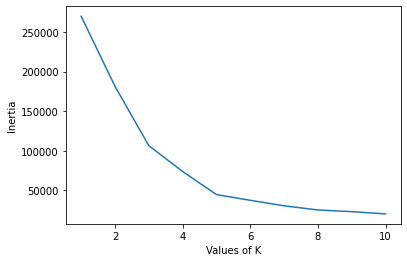

In [ ]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)
plt.xlabel('Values of K')
plt.ylabel('Inertia')

Averigüemos ahora el centro de cada grupo, nos dara una idea del punto de datos más cercano a cualquiera de estos centros, donde los datos se agregarán a ese grupo en particular.


In [ ]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

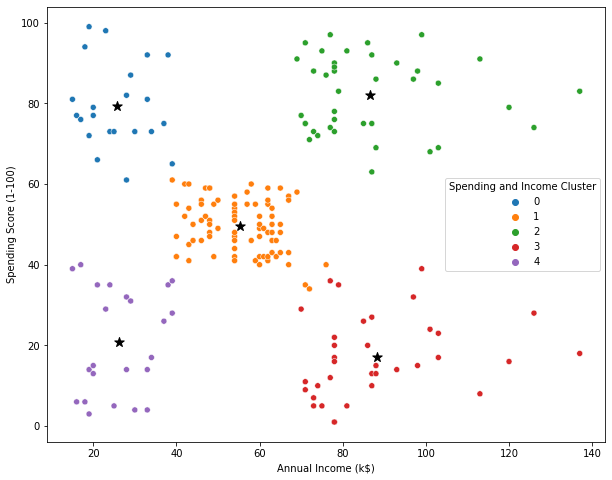

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [ ]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [ ]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


Análisis/recomendaciones

Del análisis de datos realizado aquí obtuvimos los siguientes hallazgos que podemos transmitir a la empresa.

- El grupo 1 muestra características de altos ingresos y altos gastos. Y tiene un 54 % de clientes mujeres; sería más beneficioso para la empresa dirigirse a este grupo con campañas de marketing personalizadas.

- El grupo 2 también es un hallazgo interesante. Los clientes, aunque tienen bajos ingresos, siguen gastando mucho. tal vez vienen por algunos artículos de venta. Se pueden realizar más análisis para tener una idea de sus preferencias de compra y, por lo tanto, anuncios de marketing personalizados.
